## TASK 4 - TWITTER SENTIMENT ANALYSIS

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import and visualize datasets

In [2]:
train_data = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv')
valid_data = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv')

In [3]:
train_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
valid_data.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


Checking for null values and duplicates

In [5]:
train_data.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [6]:
valid_data.isnull().sum()

3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                                                                                                                                                                                                                                            0
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣    0
dtype: i

In [7]:
train_data.duplicated().sum()

2700

In [8]:
valid_data.duplicated().sum()

0

Checking for distribution of sentiment labels

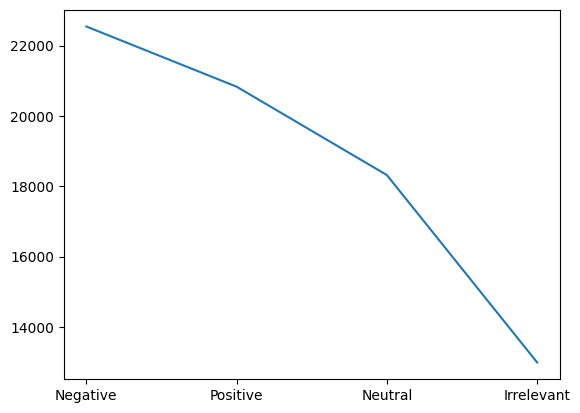

In [9]:
plt.plot(train_data.iloc[:,2].value_counts())
plt.show()

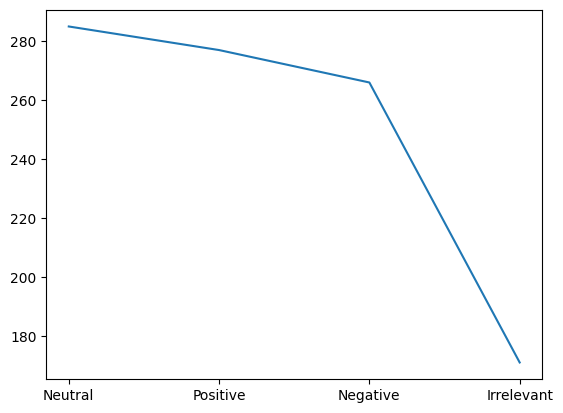

In [10]:
plt.plot(valid_data.iloc[:,2].value_counts())
plt.show()

In [11]:
unique_entities = train_data.iloc[:,1].nunique()
unique_entities


32

Data cleaning by removing duplicates in the training dataset

In [12]:
train_data_clean = train_data.drop_duplicates()
train_data_clean = train_data_clean.dropna(subset=[train_data.columns[3]])

In [14]:
train_data_clean.duplicated().sum()

0

In [15]:
train_data_clean.isnull().sum()

2401                                                     0
Borderlands                                              0
Positive                                                 0
im getting on borderlands and i will murder you all ,    0
dtype: int64

## Plotting the Sentiment Distribution

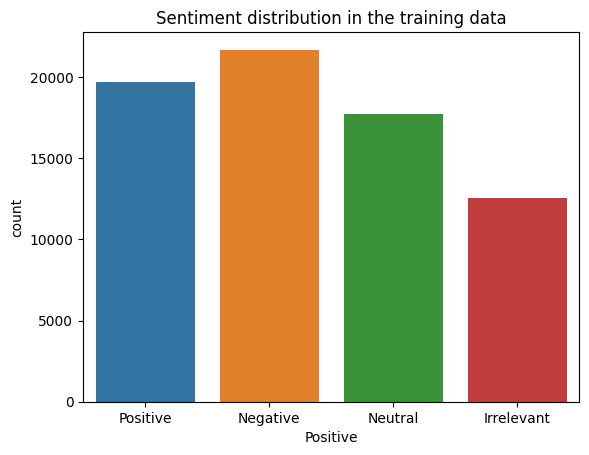

In [20]:
sns.countplot(data=train_data_clean, x=train_data_clean.columns[2], order=["Positive", "Negative", "Neutral", "Irrelevant"])
plt.title('Sentiment distribution in the training data')
plt.show()

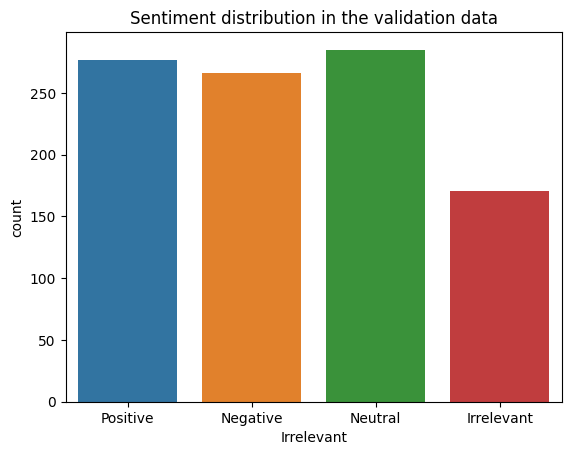

In [21]:
sns.countplot(data=valid_data, x=valid_data.columns[2], order=["Positive", "Negative", "Neutral", "Irrelevant"])
plt.title('Sentiment distribution in the validation data')
plt.show()

## Plotting the Entity Distribution

Text(0.5, 1.0, 'Entity distibution in the training data')

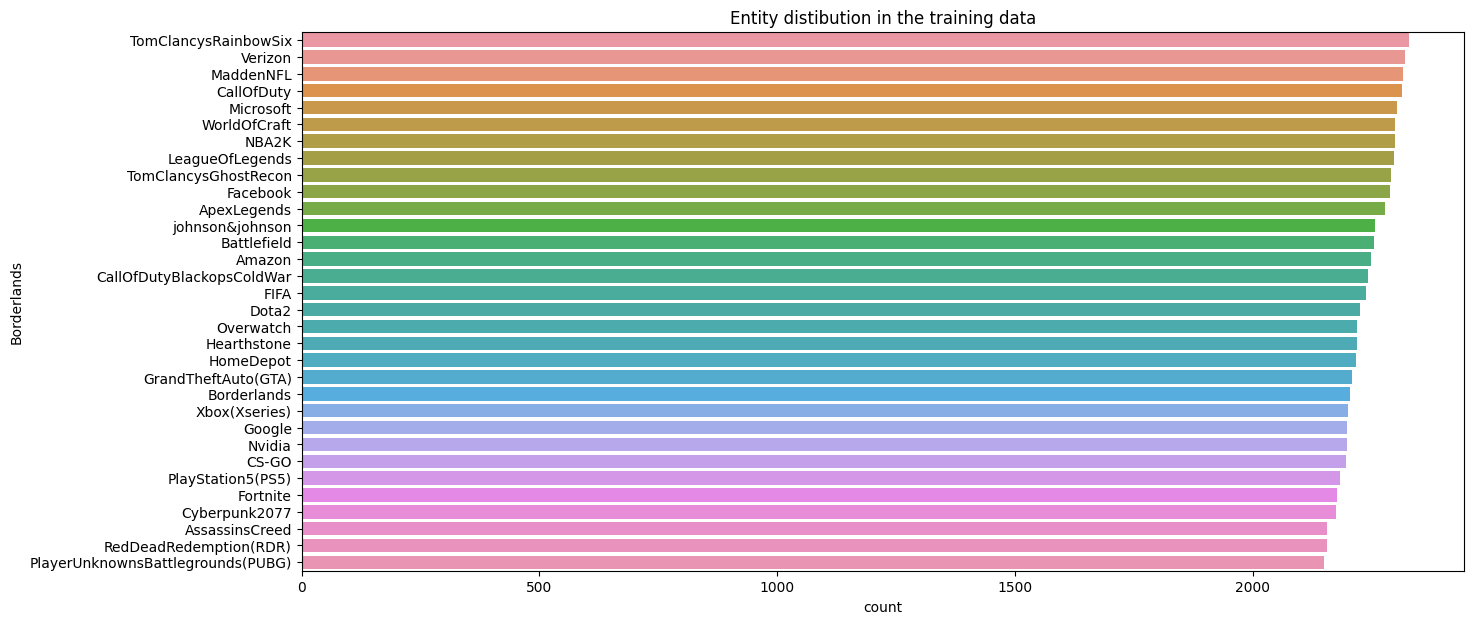

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(data=train_data_clean, y=train_data_clean.columns[1], order=train_data_clean[train_data_clean.columns[1]].value_counts().index)
plt.title('Entity distibution in the training data')

## Visualizing the message length distribution 

In [28]:
train_data_clean["message_length"] = train_data_clean[train_data_clean.columns[3]].apply(len)
valid_data["message_length"] = valid_data[valid_data.columns[3]].apply(len)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Message Length in Training Data')

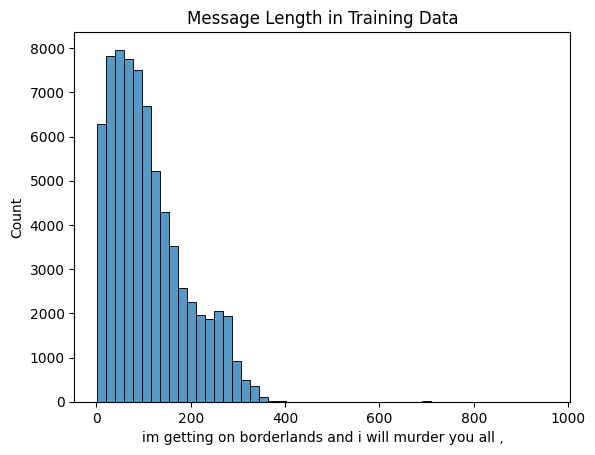

In [30]:
sns.histplot(train_data_clean.message_length, bins=50)
plt.title('Message Length in Training Data')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


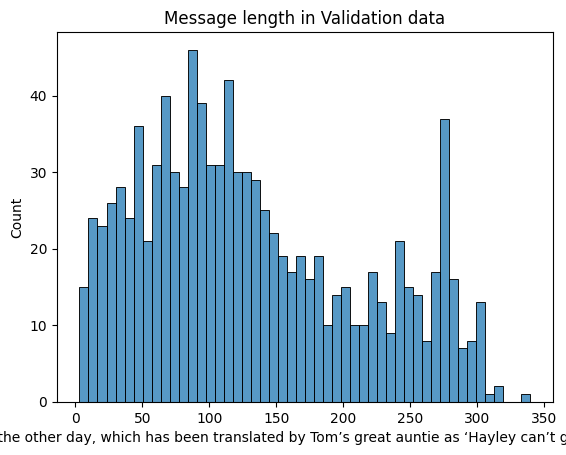

In [33]:
sns.histplot(valid_data.message_length, bins=50)
plt.title('Message length in Validation data')
plt.show()

## Plotting Sentiment Distribution by Entity

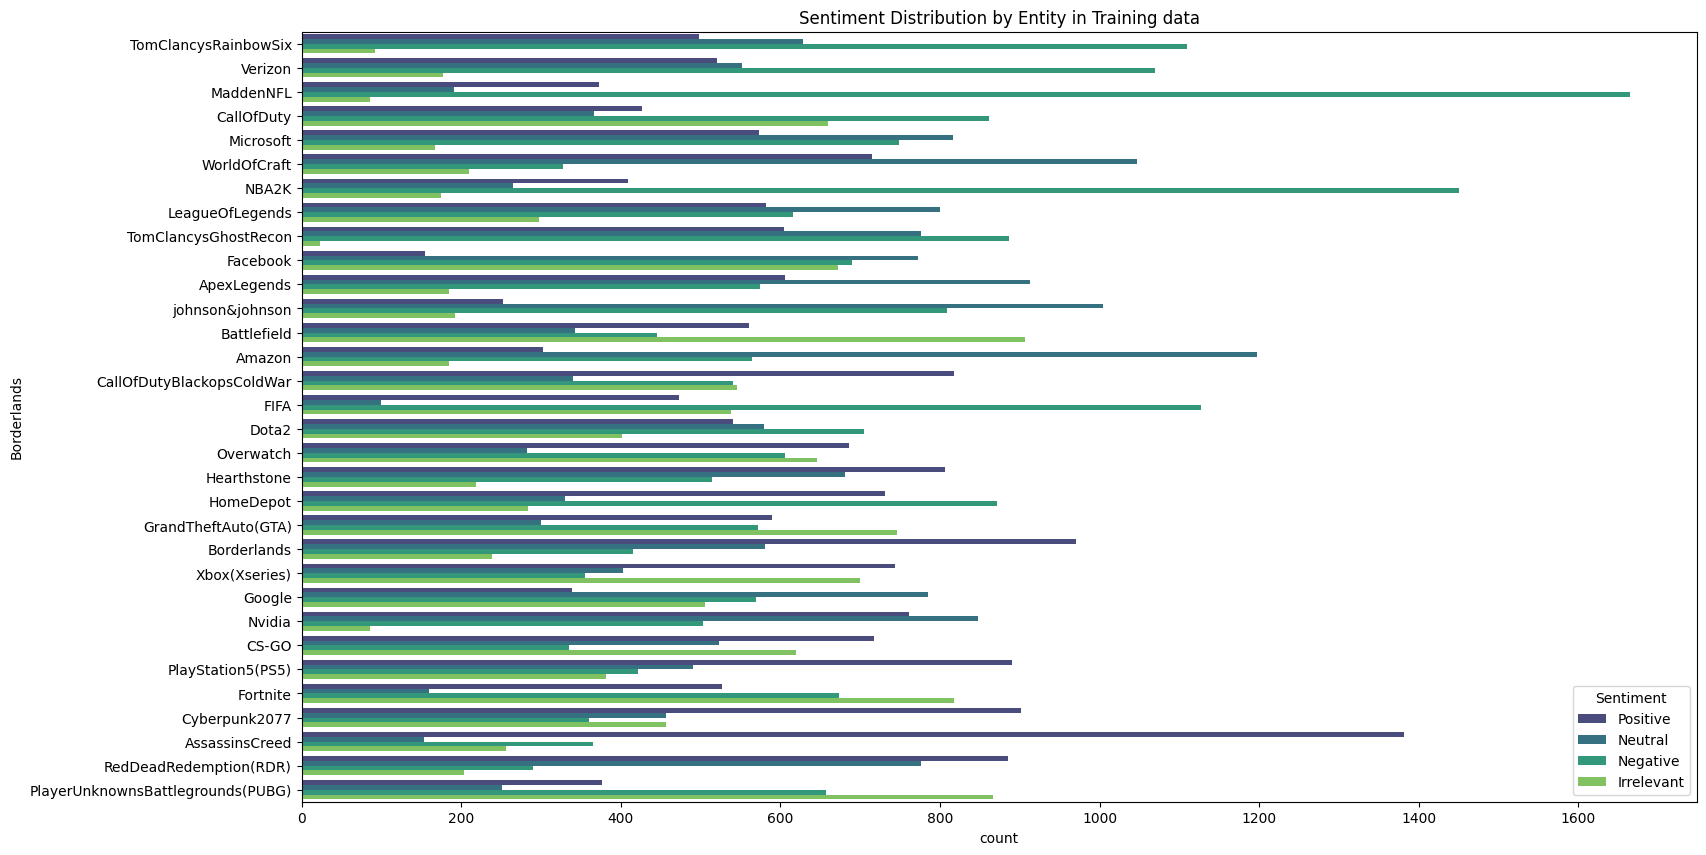

In [36]:
plt.figure(figsize=(18,10))
sns.countplot(data=train_data_clean, y=train_data_clean.columns[1], hue=train_data_clean.columns[2], order=train_data_clean[train_data_clean.columns[1]].value_counts().index, palette='viridis')
plt.title('Sentiment Distribution by Entity in Training data')
plt.legend(title='Sentiment')
plt.show()

## Plotting the Sentiment Distirbution by Message Length

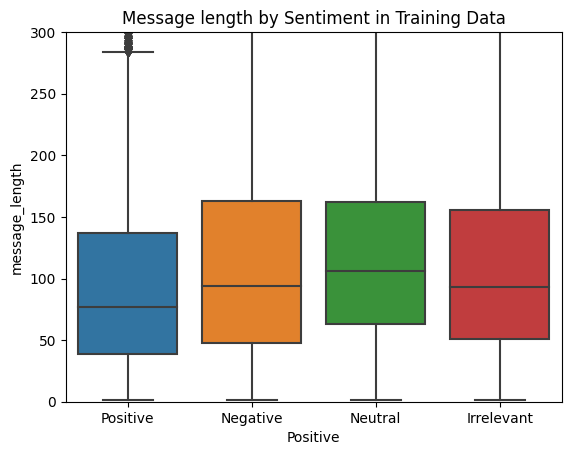

In [39]:
sns.boxplot(data=train_data_clean, x=train_data_clean.columns[2], y='message_length', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Message length by Sentiment in Training Data')
plt.ylim(0,300)
plt.show()

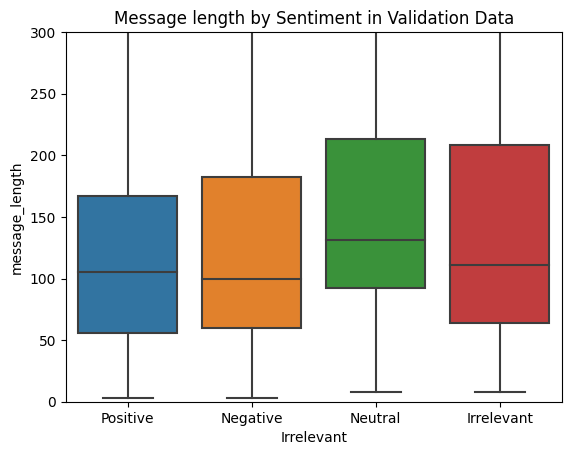

In [40]:
sns.boxplot(data=valid_data, x=valid_data.columns[2], y='message_length', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Message length by Sentiment in Validation Data')
plt.ylim(0,300)
plt.show()

## Generating Word Clouds for the Training dataset

In [41]:
from wordcloud import WordCloud

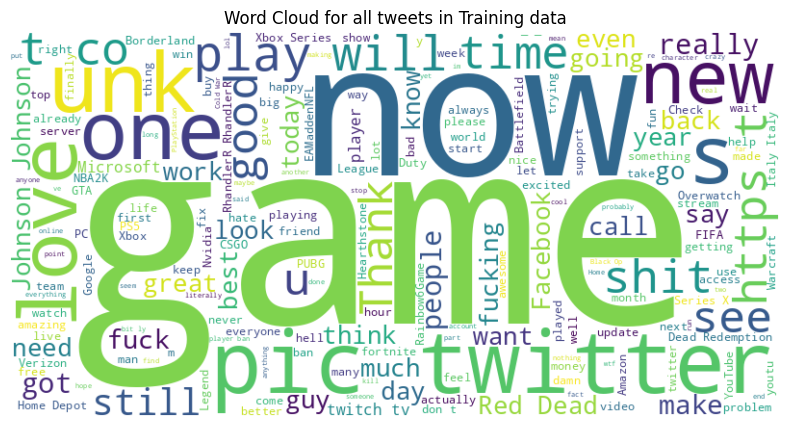

In [43]:
all_text = " ".join(tweet for tweet in train_data_clean[train_data_clean.columns[3]])
wordcloud_all = WordCloud(background_color='white', width=800, height=400).generate(all_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for all tweets in Training data')
plt.show()

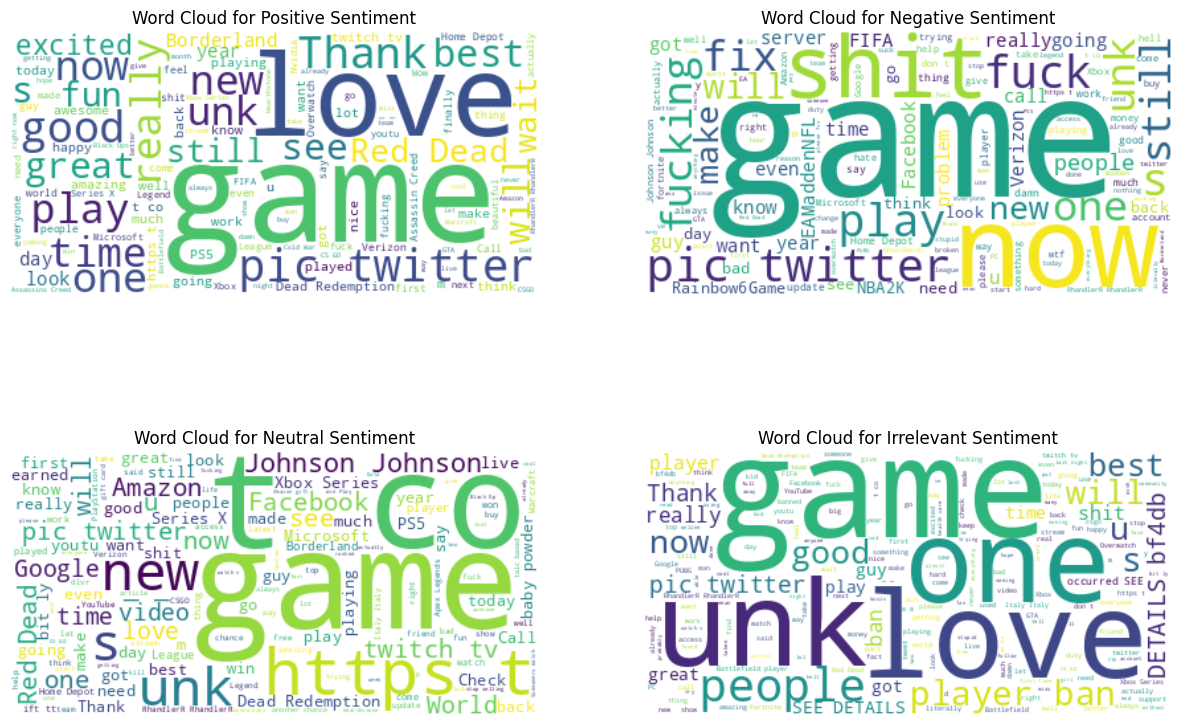

In [46]:
sentiments = ['Positive', 'Negative', 'Neutral', 'Irrelevant']

fig, ax = plt.subplots(2, 2, figsize=(15,10))

for sentiment, ax in zip(sentiments, ax.ravel()):
    sent_text = " ".join(tweet for tweet in train_data_clean[train_data_clean[train_data_clean.columns[2]]==sentiment][train_data_clean.columns[3]])
    wordcloud_sent = WordCloud(background_color='white', width=400, height=200).generate(sent_text)
    
    ax.imshow(wordcloud_sent, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Word Cloud for {sentiment} Sentiment')
                 
plt.show()